## Momentum Strategy for SP500

Del video de dos partes:
- Parte 1: https://www.youtube.com/watch?v=dO0NM_SzWfI&ab_channel=Algovibes
- Parte 2: https://www.youtube.com/watch?v=73xjY6WeKR4&ab_channel=Algovibes 


### Parte 1: Data handling and cleaning

Tenemos que primero descargar la data y limpiarla, para eliminar el famoso "survivorship bias"

In [58]:
import yfinance as yf
import pandas as pd
import numpy as np 

In [59]:
start = "2015-01-01"
overall = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

In [60]:
overall

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [61]:
# Me quedo con los simbolos unicamente
stocks = overall.Symbol

In [62]:
# Cionviente a una lista con el metodo to_list()
stocks = stocks.to_list()

In [63]:
# Solo los stocks relevantes son los que se añadieron luego de mi fecha de inicio del analisis
overall = overall[overall['Date added'] >= start]

In [64]:
removed = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[1][["Date", "Removed"]]

In [65]:
removed
# Este df te muestra la fecha hasta la que se tiene que incluir ese stock en particular, porque luego fue deslistado

Date Removed                          
                  Date  Ticker                  Security
0          May 4, 2023     FRC       First Republic Bank
1       March 20, 2023    LUMN        Lumen Technologies
2       March 15, 2023    SBNY            Signature Bank
3       March 15, 2023    SIVB       SVB Financial Group
4      January 5, 2023     VNO      Vornado Realty Trust
..                 ...     ...                       ...
319       June 9, 1999     HPH  Harnischfeger Industries
320  December 11, 1998     LDW                     Amoco
321  December 11, 1998     GRN                General Re
322  December 11, 1998     SUN                SunAmerica
323      June 17, 1997     USL                    USLife

[324 rows x 3 columns]

In [66]:
# Seteamos la fecha como el indice del df
removed = removed.set_index(removed["Date"]["Date"])

In [67]:
# Ahora transformo ese index en un datetime index
removed.index = pd.to_datetime(removed.index)

In [68]:
# Filtramos las filas que no nos srive, porque se listaron antes de la fecha de inicio de nuestro analisis
removed = removed[removed.index >= start]

In [69]:
# Eliminamos NaN
removed = removed["Removed"].dropna()

In [70]:
removed

,Ticker,Security
Date,,
2023-05-04,FRC,First Republic Bank
2023-03-20,LUMN,Lumen Technologies
2023-03-15,SBNY,Signature Bank
2023-03-15,SIVB,SVB Financial Group
2023-01-05,VNO,Vornado Realty Trust
...,...,...
2015-03-23,AVP,Avon Products
2015-03-18,CFN,Carefusion
2015-03-12,PETM,PetSmart


In [71]:
len(stocks)

503

Ahora tenemos que añadir los simbolos removidos en la lista de stocks, para asi eliminar el survivorship bias del que ya hemos hablado

In [72]:
stocks.extend(removed["Ticker"].to_list())
# Ahora la lista stocks tiene 339 elementos, a comparacion de 154 que tenia antes

In [73]:
df = yf.download(stocks, start=start)["Close"]

[*********************100%***********************]  682 of 682 completed

79 Failed downloads:
- RHT: No timezone found, symbol may be delisted
- DWDP: No timezone found, symbol may be delisted
- XL: No timezone found, symbol may be delisted
- SIAL: No data found for this date range, symbol may be delisted
- HFC: No timezone found, symbol may be delisted
- LVLT: No data found for this date range, symbol may be delisted
- FLIR: No timezone found, symbol may be delisted
- CMCSK: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted
- LLL: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- DNR: No timezone found, symbol may be delisted
- CERN: No timezone found, symbol may be delisted
- NLSN: No timezone found, symbol may be delisted
- STJ: No data found for this date range, symbol may be delisted
- TE: No data found for this date range, symbol may be delisted
- TYC: No data f

In [74]:
 # Convertimos nuevamente el index en el datatime
df.index = pd.to_datetime(df.index)

In [75]:
removed

,Ticker,Security
Date,,
2023-05-04,FRC,First Republic Bank
2023-03-20,LUMN,Lumen Technologies
2023-03-15,SBNY,Signature Bank
2023-03-15,SIVB,SVB Financial Group
2023-01-05,VNO,Vornado Realty Trust
...,...,...
2015-03-23,AVP,Avon Products
2015-03-18,CFN,Carefusion
2015-03-12,PETM,PetSmart


In [76]:
# Como ejemplo, cogemos un simbolo delistado para ver su fecha
removed[removed["Ticker"] == "SBNY"].index[0]

Timestamp('2023-03-15 00:00:00')

In [77]:
# Validamos hasta cuando ha guardado precio en nuestro analisis.
df["SBNY"]

# Vemos que sigue mostrando precio hasta el dia de hoy, a pesar que fue delistado el 15 de marzo del 2023

Date
2015-01-02    125.250000
2015-01-05    121.809998
2015-01-06    120.360001
2015-01-07    120.970001
2015-01-08    124.080002
                 ...    
2023-05-17      0.137000
2023-05-18      0.146000
2023-05-19      0.139900
2023-05-22      0.124900
2023-05-23      0.134900
Name: SBNY, Length: 2112, dtype: float64

In [78]:
# Vamos a crear un filtro para cambiar este comportamiento, ya que no debería mostrar data en esas fechas

df["SBNY"] = df["SBNY"][df["SBNY"].index <= removed[removed["Ticker"] == "SBNY"].index[0]]

In [79]:
df["SBNY"] # Ahora muestra NaN en esas fechas, como deberia ser

Date
2015-01-02    125.250000
2015-01-05    121.809998
2015-01-06    120.360001
2015-01-07    120.970001
2015-01-08    124.080002
                 ...    
2023-05-17           NaN
2023-05-18           NaN
2023-05-19           NaN
2023-05-22           NaN
2023-05-23           NaN
Name: SBNY, Length: 2112, dtype: float64

Ahora creamos funciones para hacer este analisis a todos los simbolos y corremos un bucle for para aplicarlo a cada uno.

In [80]:
# Funcion para aplicar el filtro de los stock removidos
def pricefilter_rem(ticker):
    df[ticker] = df[ticker][df[ticker].index <= removed[removed["Ticker"] == ticker].index[0]]

In [81]:
# Funcion para aplicar el filtro de los stock añadidos
def pricefilter_add(ticker):
    df[ticker] = df[ticker][df[ticker].index >= overall[overall["Symbol"] == ticker]["Date added"].values[0]]

In [82]:
# Iteramos para aplicar la funcion
for ticker_rem in removed["Ticker"]:
    pricefilter_rem(ticker_rem)

for ticker_add in overall["Symbol"]:
    pricefilter_add(ticker_add)

Con esto ya tenenmos el df listo y libre de survivorship bias,o sea filtrado por stocks agregados o retirados

In [83]:
# Calculamos los cambios relativos porcentuales con pct_change, que calcula el cambio porcentual con la fila anterior por defecto.
ret_df = df.pct_change()

In [84]:
ret_df

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018738,-0.057935,NaN,NaN,-0.028172,-0.018819,-0.008512,-0.006433,0.000223,NaN,...,-0.027362,-0.006932,-0.021818,-0.062237,NaN,-0.020318,0.037304,NaN,-0.037469,-0.006003
2015-01-06,-0.015578,0.007353,NaN,NaN,0.000094,-0.004950,0.005463,-0.025357,-0.011356,NaN,...,-0.005316,-0.012410,-0.013383,-0.005881,NaN,-0.012274,-0.008477,NaN,-0.038193,-0.009756
2015-01-07,0.013272,0.025879,NaN,NaN,0.014022,0.040417,0.019960,0.031829,0.008108,NaN,...,0.010133,0.025918,0.012811,0.007887,NaN,0.033138,0.024870,NaN,0.009546,0.020643
2015-01-08,0.029975,0.028461,NaN,NaN,0.038422,0.010459,0.002283,0.045064,0.020554,NaN,...,0.016645,0.024689,0.027530,0.007546,NaN,0.017420,0.010617,NaN,0.013994,0.015399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-17,0.011719,0.000000,0.050000,0.040566,0.003603,0.000419,0.001088,0.000000,-0.005211,NaN,...,0.022435,-0.006927,0.000000,0.006682,NaN,-0.011241,-0.003782,0.019859,0.101431,-0.013833
2023-05-18,0.010722,0.000000,0.009390,-0.005078,0.013666,0.000628,0.000172,0.000000,-0.003216,NaN,...,0.009063,0.008969,0.000000,0.004618,NaN,0.008964,0.005137,0.028196,0.040886,0.004359
2023-05-19,-0.002091,0.000000,-0.015282,-0.033503,0.000628,0.011642,-0.008180,0.000000,0.004241,NaN,...,0.004633,-0.007654,0.000000,0.005362,NaN,-0.001228,-0.000148,0.005263,-0.017254,-0.000946


Calculamos ahora los retornos acumulados por MES (monthly_return), esto se explica en otro video pero basicamente asume que se suma mas 1. INVESTIGAR

In [90]:
# Metodo resample usa 'M' para indicar que se haga el resample basado en Meses. Resample requeire un df que tenga como indice una fecha o timestamp.
# .prod se usa para que se multiplique
mtl_ret = (ret_df + 1).resample('M').prod()

In [91]:
mtl_ret

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,0.931213,0.985516,1.000000,1.000000,1.071618,0.915920,1.050741,1.386760,0.996882,1.0,...,0.941721,0.963412,0.957818,0.895483,1.0,0.999032,0.995648,1.000000,0.846942,0.986608
2015-02-28,1.117554,0.945048,1.000000,1.000000,1.096449,1.002486,1.081115,1.174913,1.058311,1.0,...,1.012812,1.059564,1.036447,1.046921,1.0,1.122164,1.073952,1.000000,1.116027,1.078633
2015-03-31,0.984364,0.873563,0.970221,1.000000,0.968628,0.967603,1.106170,1.177496,0.978045,1.0,...,0.960018,0.960008,0.941392,0.980952,1.0,0.970534,0.976161,1.000000,1.009723,1.004339
2015-04-30,0.995668,1.038700,0.914930,1.000000,1.005786,1.104544,1.005542,0.883208,1.001943,1.0,...,1.027882,1.002162,0.894942,1.057110,1.0,1.091972,0.934649,1.000000,1.049630,0.959602
2015-05-31,0.995649,0.931446,0.877407,1.000000,1.040991,1.029848,0.984777,0.944638,1.046963,1.0,...,0.975163,1.020392,0.993044,0.987844,1.0,1.048278,1.038693,1.000000,1.019054,1.120441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,1.016238,1.000000,1.268868,1.035707,1.110521,0.914238,1.019613,1.000000,1.006922,1.0,...,1.051768,1.156721,1.000000,0.940671,1.0,1.018972,0.998745,1.233103,1.081367,1.129239
2023-02-28,0.933522,1.000000,0.990087,0.951931,1.021623,1.041624,0.920691,1.000000,0.920127,1.0,...,0.947418,1.033668,1.000000,0.986924,1.0,0.974332,0.972750,0.949617,0.952220,1.009124
2023-03-31,0.974431,1.000000,0.923029,0.838921,1.118649,1.035543,1.029249,1.000000,0.995478,1.0,...,0.997725,1.031784,1.000000,1.019971,1.0,1.038691,1.043029,1.059117,0.591268,0.996647


La explicacion del df de arriba es que por ejemplo APPL subió 7.16% respecto al mes pasado.
Este df es importante porque nos muestra el retorno de holdear por un mes .

Ahora vamos a hacer u rolling sobre este df con una ventana de 12 y aplicamos el producto. Matematicamente es comoa cumular el retorno diario en un periodo de un mes.
Eliminamos valores NaN

In [92]:
mtl_12 = mtl_ret.rolling(12).apply(np.prod).dropna()

In [95]:
mtl_12

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,1.030819,0.621536,0.778493,0.928673,0.962773,0.899074,1.146474,2.419726,1.000223,1.0,...,0.839707,1.171770,0.773091,0.958508,1.0,1.009675,0.911182,1.000000,0.965005,1.106442
2016-01-31,0.996823,0.465815,0.716728,0.938175,0.830830,0.909694,0.942241,1.649208,0.845621,1.0,...,0.890528,1.177094,0.740319,1.054252,1.0,1.001245,0.885459,1.000000,0.946578,1.007489
2016-02-29,0.884861,0.603786,0.753676,0.915901,0.752686,0.902645,0.842935,1.316170,0.817817,1.0,...,0.905241,1.149972,0.704029,1.047899,1.0,0.893478,0.804137,1.000000,0.797307,0.890866
2016-03-31,0.959085,0.741486,0.776999,0.989326,0.875914,0.975743,0.761415,1.324532,0.902871,1.0,...,0.983412,1.211043,0.868482,1.167904,1.0,1.039761,0.907335,1.000000,0.896667,0.957658
2016-04-30,0.989123,0.832340,0.718368,0.963164,0.749021,0.943396,0.744532,1.536539,0.838001,1.0,...,1.011789,1.168627,0.834783,1.128579,1.0,0.925547,1.053988,1.000000,0.971066,1.058757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,1.091588,1.000000,0.979964,0.657769,0.825552,1.079334,1.240529,1.287795,0.867331,1.0,...,1.527251,0.689442,1.000000,0.990383,1.0,1.042662,1.066170,0.621032,0.783840,0.828320
2023-02-28,1.089061,1.000000,0.926377,0.708920,0.892745,1.041483,1.091419,1.226170,0.843310,1.0,...,1.401556,0.703177,1.000000,1.154019,1.0,1.037363,1.003114,0.726400,0.714064,0.862381
2023-03-31,1.045417,1.000000,0.808219,0.587601,0.944390,0.983098,1.034904,1.150284,0.855526,1.0,...,1.327764,0.798050,1.000000,1.228008,1.0,1.114317,1.010164,0.768673,0.456528,0.882549


Ahora tenemos que filtrar los TOP performers para cualquier fecha. Esto se puede hacer filtrando los 5 mejores valores en cada fila.

In [96]:
top_ = mtl_12.loc['2015-12-31'].nlargest(5)

In [99]:
top_
# EStos son los top performes de los ultimos 12 meses hastala fecha 2015-12-31

ABMD    2.419726
NFLX    2.294549
AMZN    2.190749
AYI     1.671433
NVDA    1.637357
Name: 2015-12-31 00:00:00, dtype: float64

In [100]:
top_.name

Timestamp('2015-12-31 00:00:00', freq='M')


Ahora hacemos un truco para filtrar la fecha de top_.name y mediante slicing tomar la siguiente fila.

In [102]:
mtl_ret[top_.name:][1:2]

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACE,...,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.900502,0.738602,0.920661,1.010232,0.924758,0.926739,0.863562,0.945171,0.842797,1.0,...,0.998717,0.96779,0.917215,0.984932,1.0,0.990691,0.967541,1.0,0.830769,0.898372


Ahora tenemos que filtrar los 5 top performers que ya habia hallado previamente.

In [103]:
relevant_ret = mtl_ret[top_.name:][1:2][top_.index]

In [104]:
relevant_ret

,ABMD,NFLX,AMZN,AYI,NVDA
Date,,,,,
2016-01-31,0.945171,0.802938,0.868485,0.865825,0.888653


ahora asumimos que compro los 5 stocks de forma equitativa, puedo calcular mi retorno medio simplemente sacando la media horizantal del df

In [114]:
relevant_ret.mean(axis=1)

Date
2016-01-31    0.874214
Freq: M, dtype: float64

#### INTERPRETACION: 
Este resultado indica que si hubiera comprado los 5 stocks que más retorno tuvieron en los últimos 6 meses hasta 2015-12-31.. mi retorno para el siguiente MES (Febrero o final de Enero) hubiera sido -12.6% 

In [109]:
# Ahora hacemos una funcion con todos los pasos

def top_performers(date):
    all_ = mtl_12.loc[date]
    top = all_.nlargest(5)
    relevant_ret = mtl_ret[top.name:][1:2][top.index]
    return (relevant_ret).mean(axis=1).values[0]

In [115]:
top_performers('2015-12-31')

0.874214231913179

In [116]:
# Ahora le pasamos todo a la funcion.
# Obviamos le ultimo elemento porque no podemos saber el ultimo retorno. [:-1]
returns = []
for date in mtl_12.index[:-1]:
    returns.append(top_performers(date))

In [119]:
# HAcemos un prod() de esta serie para ver el retorno cumulativo.
pd.Series(returns).prod()

3.1005389882422785

<Axes: xlabel='Date'>

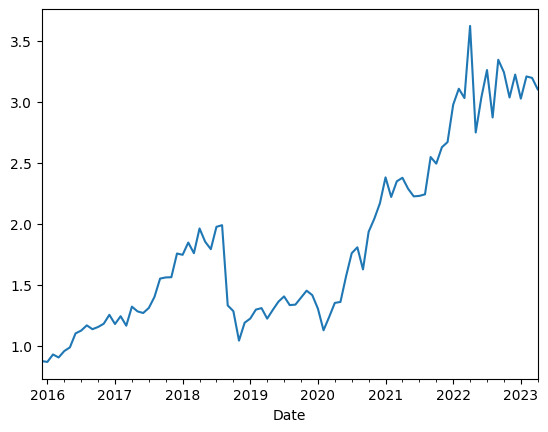

In [120]:
# Visualizamos el cumulative product y usamos el index del mtl_12 como indice
pd.Series(returns, index=mtl_12.index[:-1]).cumprod().plot()

#### Comparación
Ahora hacemos un benchmark contra el SP500, necesario porque tenemos que saber si la estrategia funciona o fue producto de un bullrun del mercado.

In [125]:
s_p500 = yf.download('^GSPC', start=start).Close

[*********************100%***********************]  1 of 1 completed


In [126]:
s_p500

Date
2015-01-02    2058.199951
2015-01-05    2020.579956
2015-01-06    2002.609985
2015-01-07    2025.900024
2015-01-08    2062.139893
                 ...     
2023-05-18    4198.049805
2023-05-19    4191.979980
2023-05-22    4192.629883
2023-05-23    4145.580078
2023-05-24    4115.240234
Name: Close, Length: 2113, dtype: float64

Dividimos el ultimo entre el primero para ver el retorno dle SP500.

In [127]:
4115.240234/2058.199951

1.999436562031091

Del resultado vemos que la estrategia claramente supera el retorno del SP500 en el mismo periodo:
- 3.1005389882422785 >  1.999436562031091

##### Ahora por ejercicio correremos la estrategia sin tomar en cuenta el survivorship bias para comparar


In [128]:
# No lo he hecho,
# Pero el retorno es de aporximadamente 18x